# Manual annotation

One of the common bioimage analysis tasks in manual annotation. This annotation could be to provide ground truth data for a machine learning algorithm or quality control for automated process.

There are 3 main types of manual annotation that napari provides, each corresponding to a different layer type
- adding points to mark particular locations in an image with the **Points** layer
- drawing 2D polygons to identify particular regions of interest with the **Shapes** layer
- painting labels to provide a pixel-wise annotation of an image with the **Labels** layer

This tutorial will explore these three manual annotations in napari, using the same data from the [Bioimage visualization in Python tutorial](intro_bioimage_visualization.md). Once again, we will try to highlight the bidirectional communication between the viewer and the Python kernel.

## Setup

In [1]:
# this cell is required to run these notebooks on Binder. Make sure that you also have a desktop tab open.
import os
if 'BINDER_SERVICE_HOST' in os.environ:
    os.environ['DISPLAY'] = ':1.0'

We start by importing `napari`, our `nbscreenshot` utility and instantiating an empty viewer

In [2]:
import napari
from napari.utils import nbscreenshot

viewer = napari.Viewer()

In this notebook we will use the same `cells3d` data set:

In [3]:
from skimage.data import cells3d

image_data = cells3d()  # shape (60, 2, 256, 256)

membranes = image_data[:, 0, :, :]
nuclei = image_data[:, 1, :, :]

viewer.add_image(nuclei)

<Image layer 'nuclei' at 0x7f6225077a50>

This loads the 3D data into the napari viewer on the 30th slice. Let's take a screenshot
for record keeping.

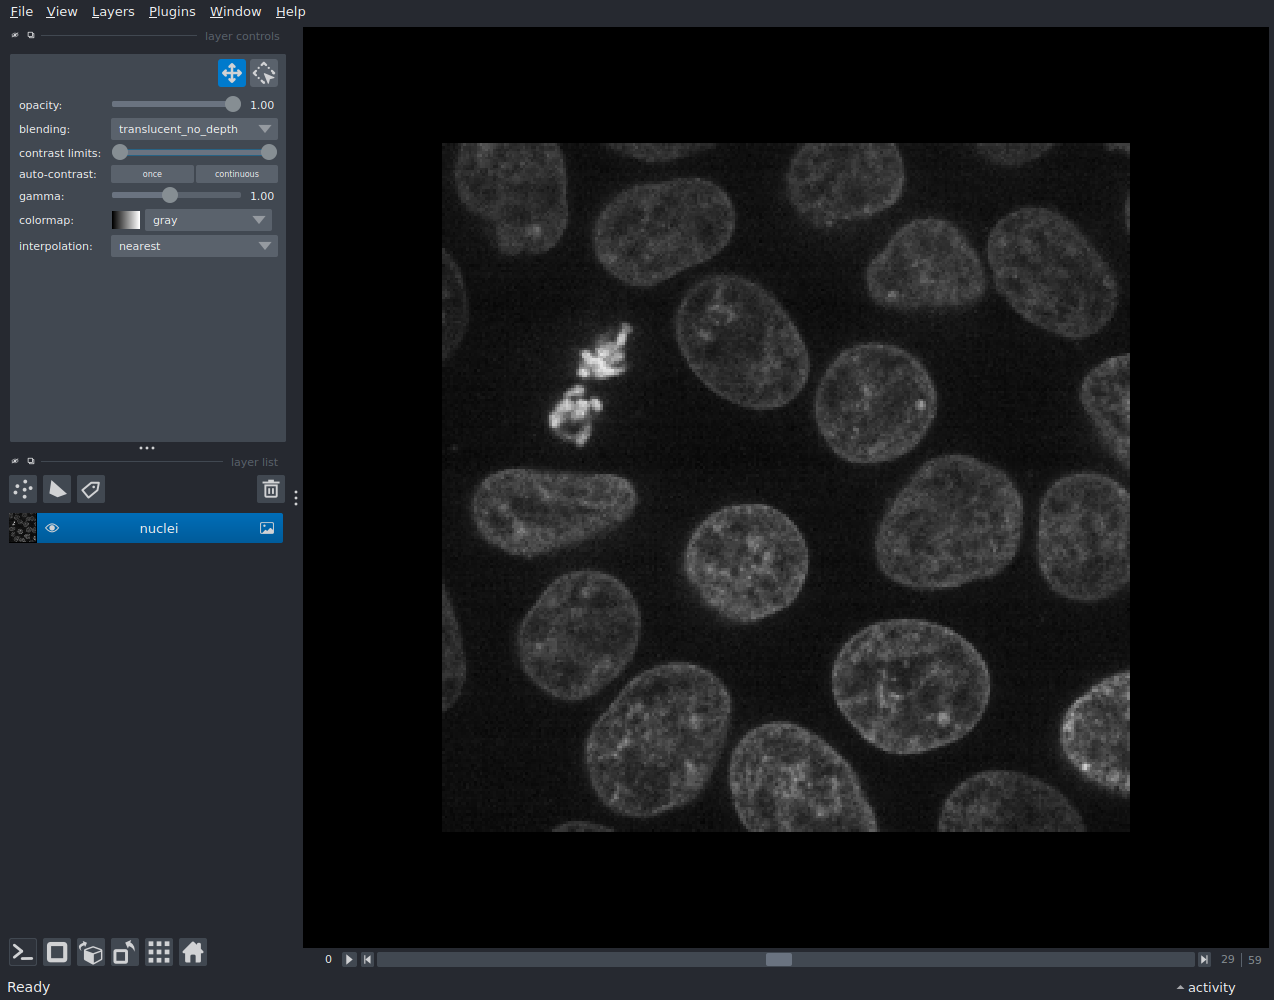

In [4]:
nbscreenshot(viewer)

## Annotating dividing and non-dividing cells using the points layer

One simple task that a biologist or bioimage analyst might be interested in is annotating each cell as dividing or non-dividing.

In order to do this we are going to add two points layers to the viewer, one called `dividing` and one called `non-dividing` and set some basic properties on these layers.

You can add the layers using the "new points" button in the `layer list` panel of the viewer (left-most button featuring with many small dots), or you can add them programmatically from the viewer. We'll add them programmatically from the viewer for this example.

In [5]:
# add the first points layer for dividing cells
viewer.add_points(name='dividing', face_color='red', n_dimensional=True, ndim=3);

# add the second points layer for non-dividing cells
viewer.add_points(name='non-dividing', face_color='blue', n_dimensional=True, ndim=3);

Notice now how two new layers have been created, and that these layers have different controls (top-left corner) compared to the image layer. These layers now have properties like `face color`, `point size`, and `symbol` that can be adjusted. Note we have also enabled something called `n_dimensional` mode for these `Points` layers. This setting will be the points an `n-dimensional` extent when scrolling through z-planes and is useful when looking at 3D data.

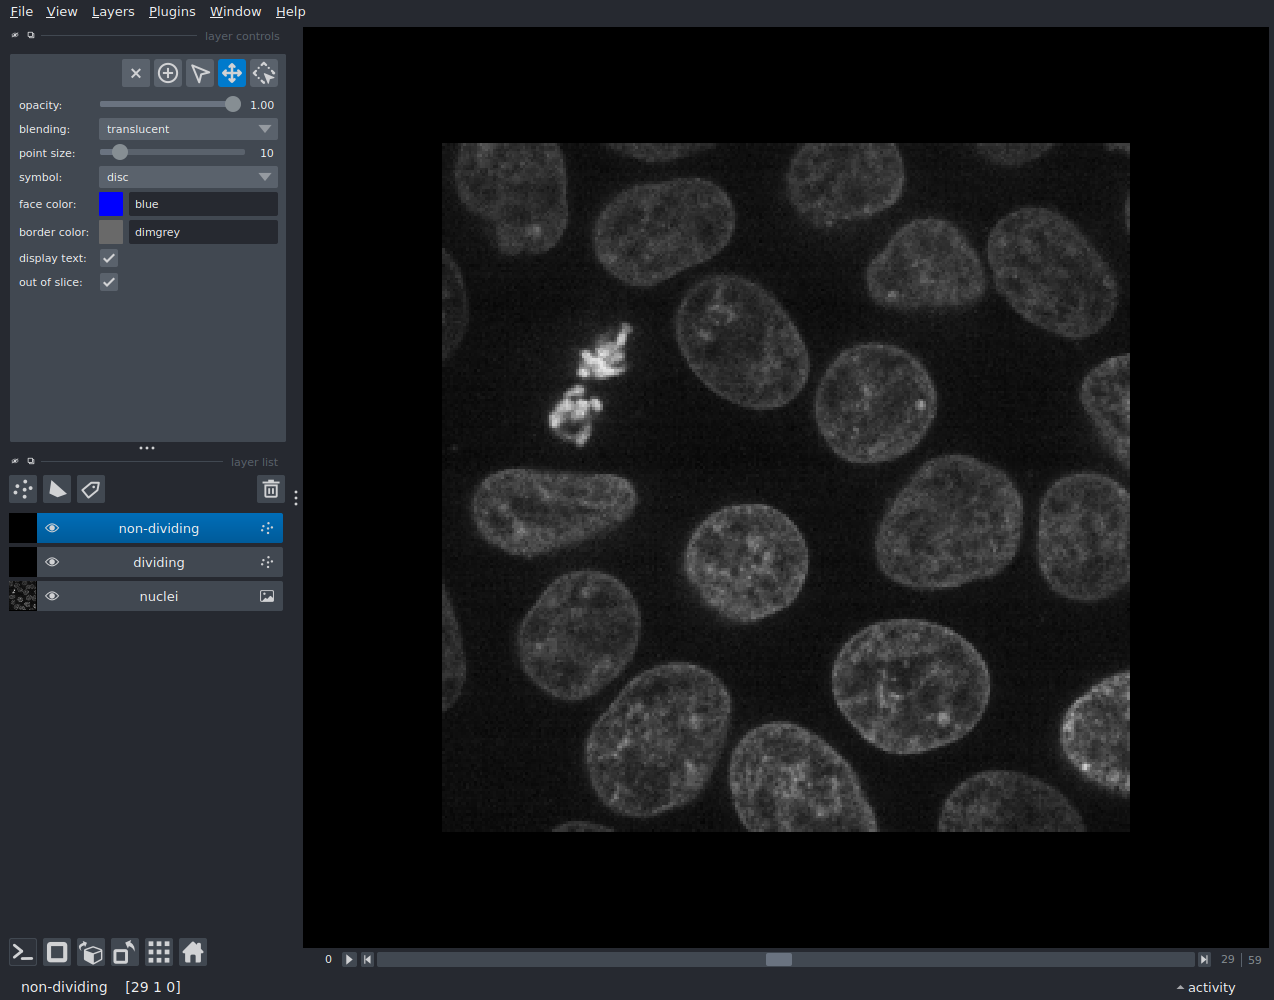

In [6]:
nbscreenshot(viewer)

To add points you must enter add mode. This can be done by clicking on the `add` mode button in the top row of the `layer controls` panel (2nd from the left, circle with a plus in it), or programmatically from the notebook.

In [7]:
# programmatically enter `add` mode for both Points layers to enable editing
viewer.layers['dividing'].mode = 'add'
viewer.layers['non-dividing'].mode = 'add'

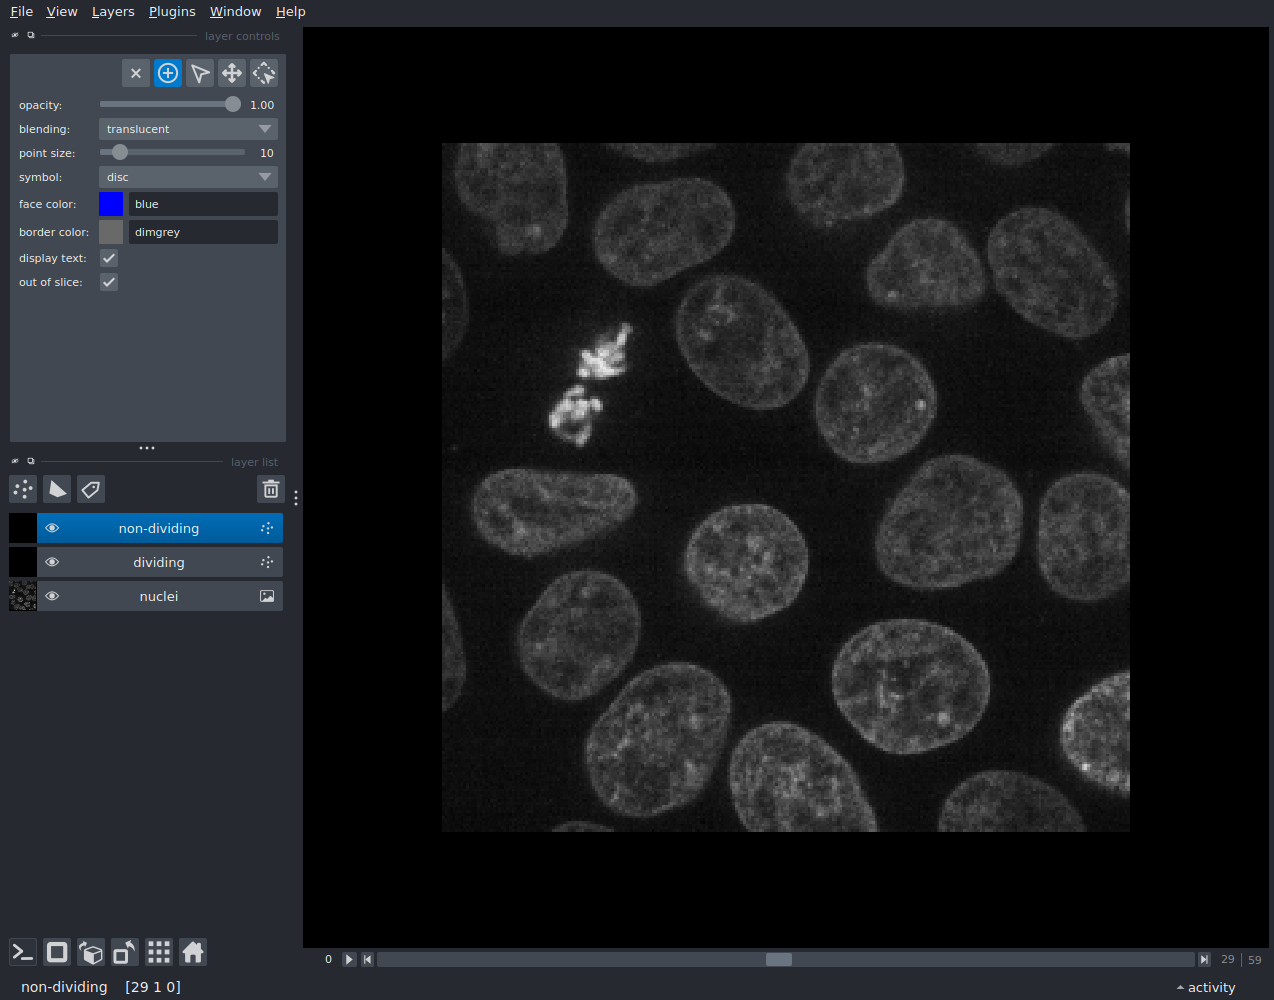

In [8]:
nbscreenshot(viewer)

Now start adding points, clicking once per cell, approximately in the center of the cell, with the appropriate `Points` layer selected. You can tell which `Points` layer is selected because it will be highlighted in the layers list in the bottom left hand corner of the screen. You can rapidly switch between selected layers using the up and down keys. Also don't forget this is a z-slice so you should move up and down the slice, which can also be done with the left/ right key.

```{note}
Points can be added in the 3D viewer mode, however it can be difficult to precisely control placement
within the volume. For more control, you may wish to investigate the tools provided by the
[napari-threedee plugin](https://napari-threedee.github.io).
```

After annotation, my data looks as follows:

In [9]:
# this data is added to represent coordinates of points placed manually
viewer.layers['dividing'].add([30, 88.1365794 , 54.39650486])
viewer.layers['non-dividing'].add(
      [[30,  13.90840911,  27.02955319],
       [30,  32.27800681,  82.51323603],
       [30,  11.28418087, 148.86872159],
       [30,  46.52381727, 182.60879899],
       [30,  73.89076894, 108.3806287 ],
       [30,  96.00926413, 160.11541406],
       [30,  47.64848652, 226.09600987],
       [30, 142.12070325, 186.73258623],
       [30, 145.86960074, 242.59115882],
       [30, 200.97839383, 173.61144502],
       [30, 154.49206496, 112.87930569],
       [30, 135.74757752,  39.77580465],
       [30, 182.60879613,  52.14716636],
       [30, 221.97221977,  82.13834628],
       [30, 241.09159696, 136.12247012],
       [30, 250.46384069, 209.60086091]]
   )

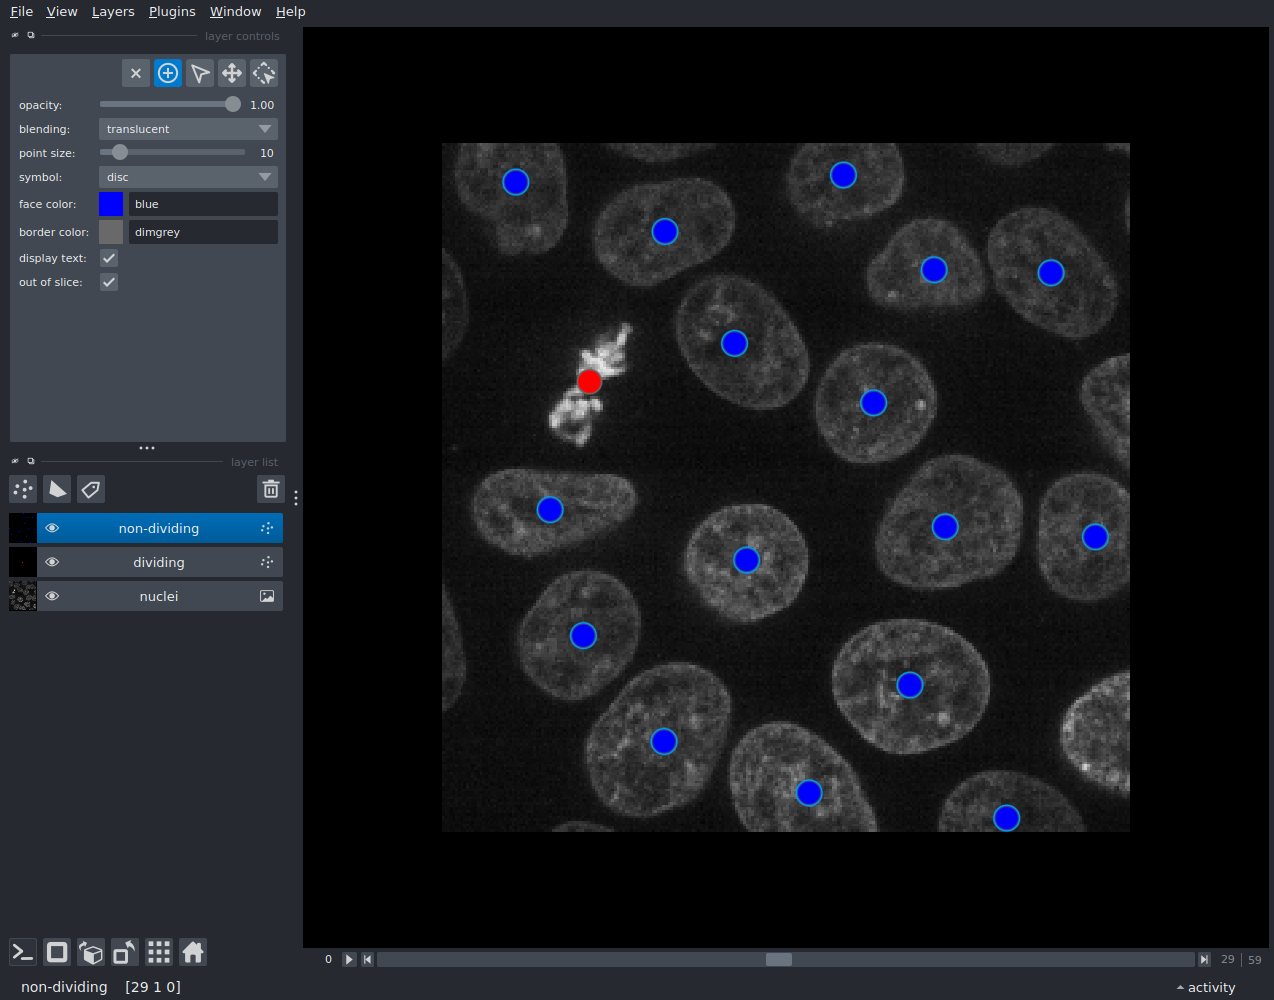

In [10]:
nbscreenshot(viewer)

Or in 3D, which can be enabled by clicking 3D rendering button (which looks like a wireframe of a cube, second from the left) like this:

In [11]:
viewer.dims.ndisplay = 3
viewer.camera.angles = (-10, 30, 135)

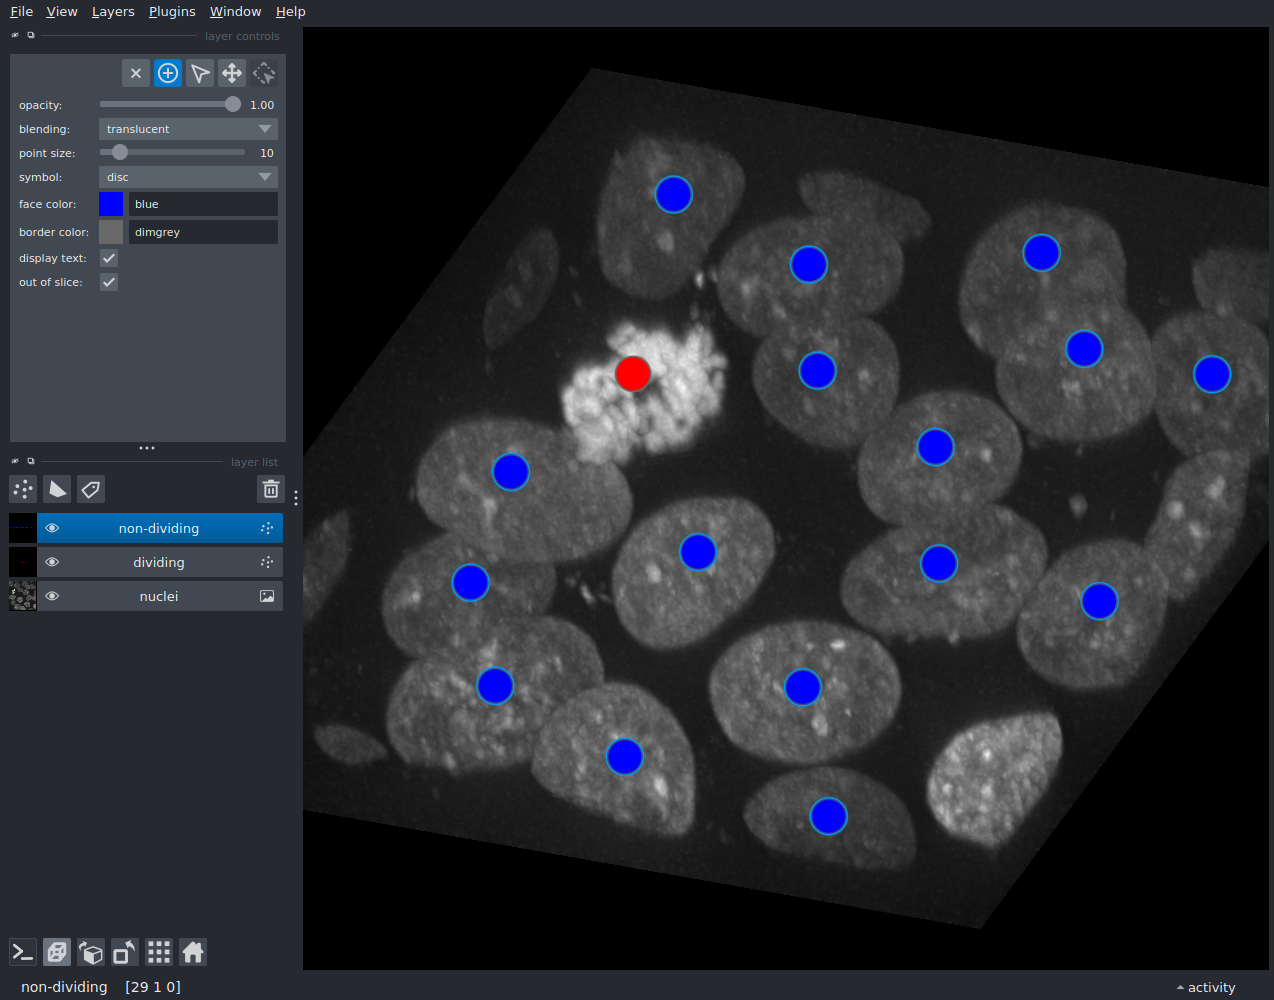

In [12]:
nbscreenshot(viewer)

You can also get the number of cells of each class and an array of their centers as follows:

In [13]:
print('Number of dividing cells: ', len(viewer.layers['dividing'].data))
print('Number of non-dividing cells: ', len(viewer.layers['non-dividing'].data))

Number of dividing cells:  1
Number of non-dividing cells:  16


In [14]:
# Locations of non-dividing cells
viewer.layers['non-dividing'].data

array([[ 30.        ,  13.90840911,  27.02955319],
       [ 30.        ,  32.27800681,  82.51323603],
       [ 30.        ,  11.28418087, 148.86872159],
       [ 30.        ,  46.52381727, 182.60879899],
       [ 30.        ,  73.89076894, 108.3806287 ],
       [ 30.        ,  96.00926413, 160.11541406],
       [ 30.        ,  47.64848652, 226.09600987],
       [ 30.        , 142.12070325, 186.73258623],
       [ 30.        , 145.86960074, 242.59115882],
       [ 30.        , 200.97839383, 173.61144502],
       [ 30.        , 154.49206496, 112.87930569],
       [ 30.        , 135.74757752,  39.77580465],
       [ 30.        , 182.60879613,  52.14716636],
       [ 30.        , 221.97221977,  82.13834628],
       [ 30.        , 241.09159696, 136.12247012],
       [ 30.        , 250.46384069, 209.60086091]])

To save a `csv` file with these values for each layer you can use our builtin writer functionality. Note these csv files can easily be opened up into standard tools like [`pandas`](https://pandas.pydata.org) or Excel for further analysis.

In [15]:
# Uncomment the lines below to save out Points layer data to csv files
#viewer.layers['dividing'].save('dividing.csv', plugin='builtins')
#viewer.layers['non-dividing'].save('non-dividing.csv', plugin='builtins')

Points layers also have a `features` dictionary that would enable you to add other attributes like `volume` or `maximum-intensity` should you calculate those for each cell. You can learn more about the these advanced points annotations from the [tutorial](https://napari.org/stable/tutorials/annotation/annotate_points.html) or the ["Add points with features" Gallery example](https://napari.org/stable/gallery/add_points_with_features.html#sphx-glr-gallery-add-points-with-features-py).


## Drawing polygons around cells
Another common task for research biologists and bioimage analysts is drawing polygons around regions of interest, in this case nuclei. These polygons might be used for segmentation and to quantify properties of interest.

```{note}
At present (napari 0.5.4), napari does not support adding or editing shapes in 3D viewer mode. This 
means they can only be drawn/edited on the orthogonal 2D slices.
However, shapes can be added programmatically that have vertexes that are not on the 2D orthogonal planes
and they will be properly rendered in 3D.
```

For the sake of this example, lets make a 2D maximum intensity projection of our cells in order to keep things simple. We can actually use the data we've already loaded into napari, because it's just a numpy array,
and use it for the projection.

In [16]:
# Take the maximum intensity projection of the cells
nuclei_mip = viewer.layers['nuclei'].data.max(axis=0)

In [17]:
# Remove select and remove all the current layers from the viewer
viewer.layers.select_all()
viewer.layers.remove_selected()

# Add in the maximum intensity projection
viewer.add_image(nuclei_mip);

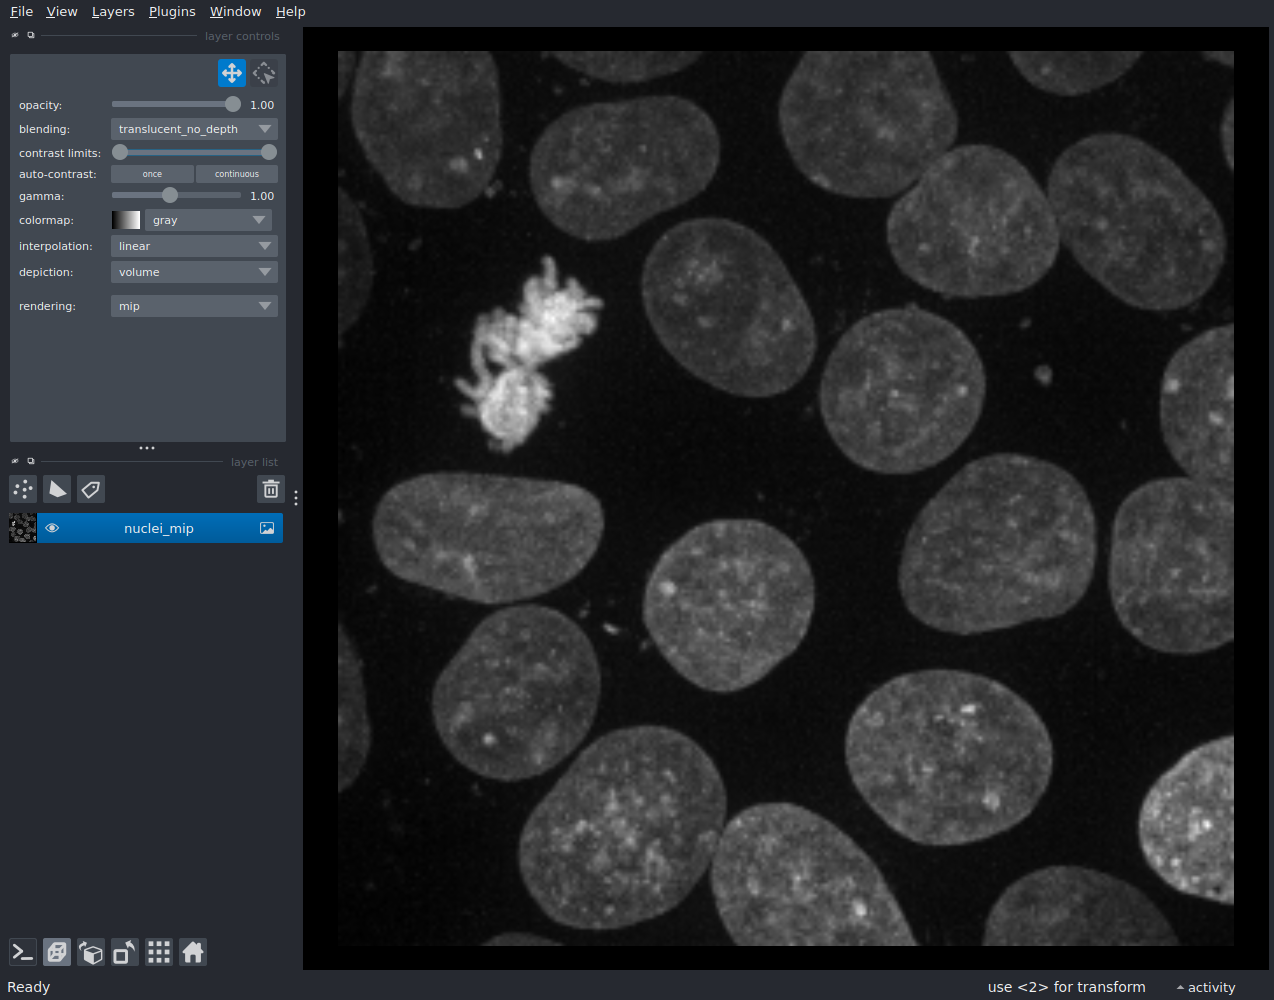

In [18]:
nbscreenshot(viewer)

We can now add an empty new shapes layer from the GUI using the new shapes button (middle of the left panel, 2nd from the left with a polygon on it) or programmatically from the notebook. (Let's ensure we're in 2D mode.)

In [19]:
viewer.dims.ndisplay = 2

viewer.add_shapes(name='nuclei outlines', face_color='red', edge_color='white', opacity=0.7)

<Shapes layer 'nuclei outlines' at 0x7f622497c950>

Notice now in top left corner of the viewer we have a new controls panel corresponding to the shapes layer with buttons for creating and editing shapes. They include a select mode for dragging and resizing shapes, a vertex selection mode for dragging vertices, tools for adding and subtracting vertices from existing shapes, buttons for reordering shapes, and tools for drawing lines, ellipses, rectangles, paths, and polygons.

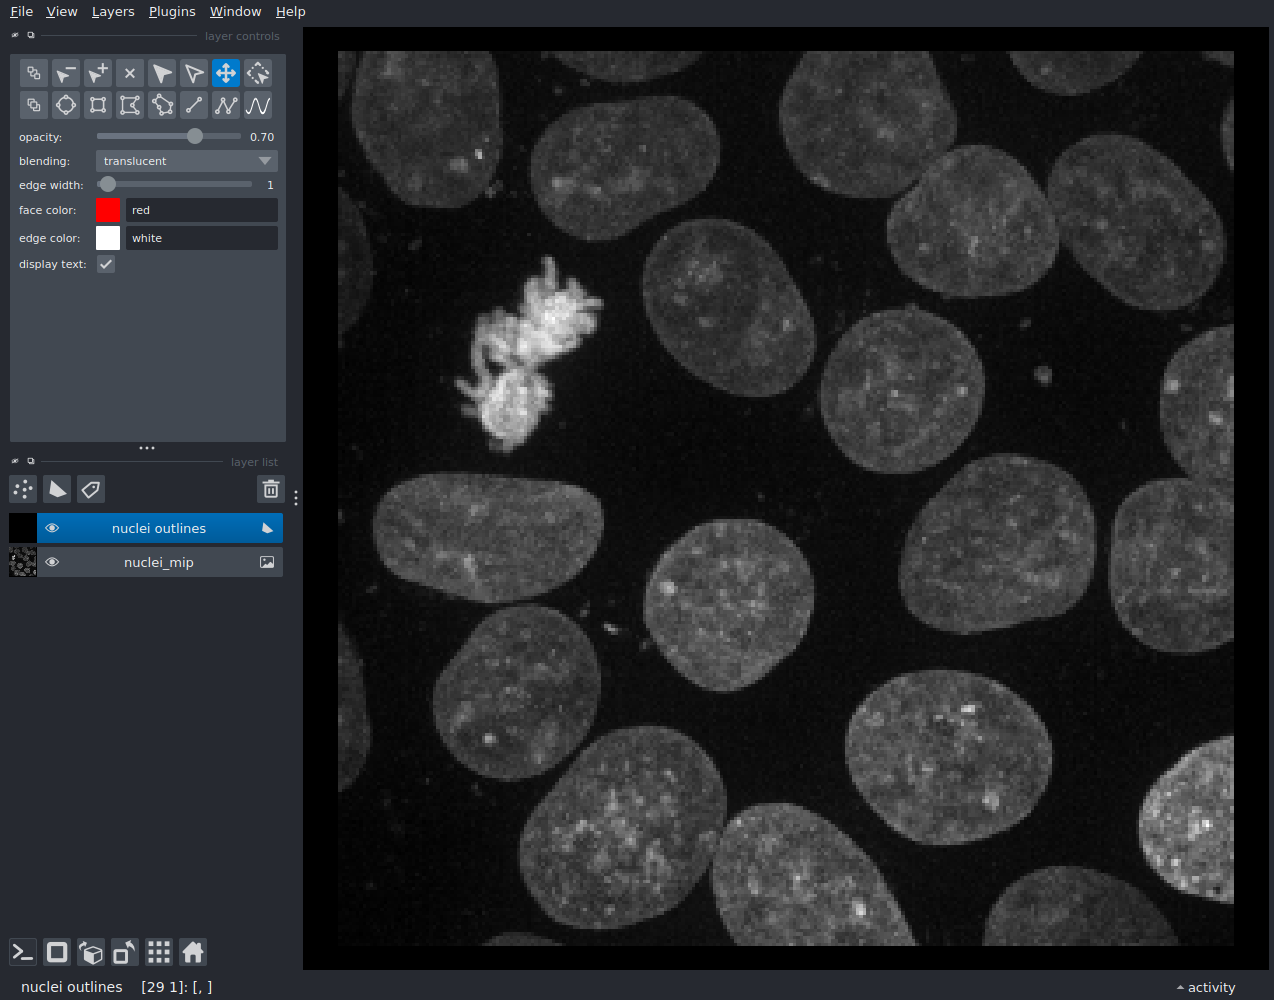

In [20]:
nbscreenshot(viewer)

We will draw some shapes with the polygon tool around a couple of different nuclei.

In [21]:
# this data is added to represent coordinates of shapes drawn manually
p1 = [[142.12070325,  94.13481824],
      [150.36827772,  89.26125151],
      [163.86430869,  87.76169251],
      [179.98456789, 100.88283373],
      [182.98368588, 113.25419544],
      [173.98633191, 124.87577766],
      [163.86430869, 133.87313163],
      [148.49382898, 135.37269063],
      [137.99691601, 128.2497854 ],
      [132.74845952, 116.25331343],
      [134.24801852, 103.50706197]]
p2 = [[ 87.01191015, 140.24625736],
      [ 97.13393338, 136.49735987],
      [109.50529509, 140.24625736],
      [118.12775932, 149.99339083],
      [120.37709781, 163.4894218 ],
      [114.75375158, 174.73611426],
      [104.25683861, 181.48412974],
      [ 93.75992564, 184.10835799],
      [ 80.26389467, 179.609681  ],
      [ 73.89076894, 166.11365004],
      [ 74.26565869, 152.24272933],
      [ 78.38944593, 145.1198241 ]]
p3 = [[ 48.02337627, 108.3806287 ],
      [ 48.02337627,  97.13393624],
      [ 58.52028924,  88.88636176],
      [ 69.39209195,  86.26213352],
      [ 83.26301267,  92.63525925],
      [ 94.50970513, 105.38151071],
      [ 98.25860262, 121.50176992],
      [ 93.01014614, 133.12335213],
      [ 80.26389467, 136.12247012],
      [ 67.51764321, 131.24890339],
      [ 53.6467225 , 123.00132891]]

viewer.layers['nuclei outlines'].add_polygons([p1, p2, p3])

# direct mode for vertex selection
viewer.layers.mode = 'direct'

# select and force redraw
viewer.layers['nuclei outlines'].selected_data = {2}
viewer.layers['nuclei outlines'].refresh()

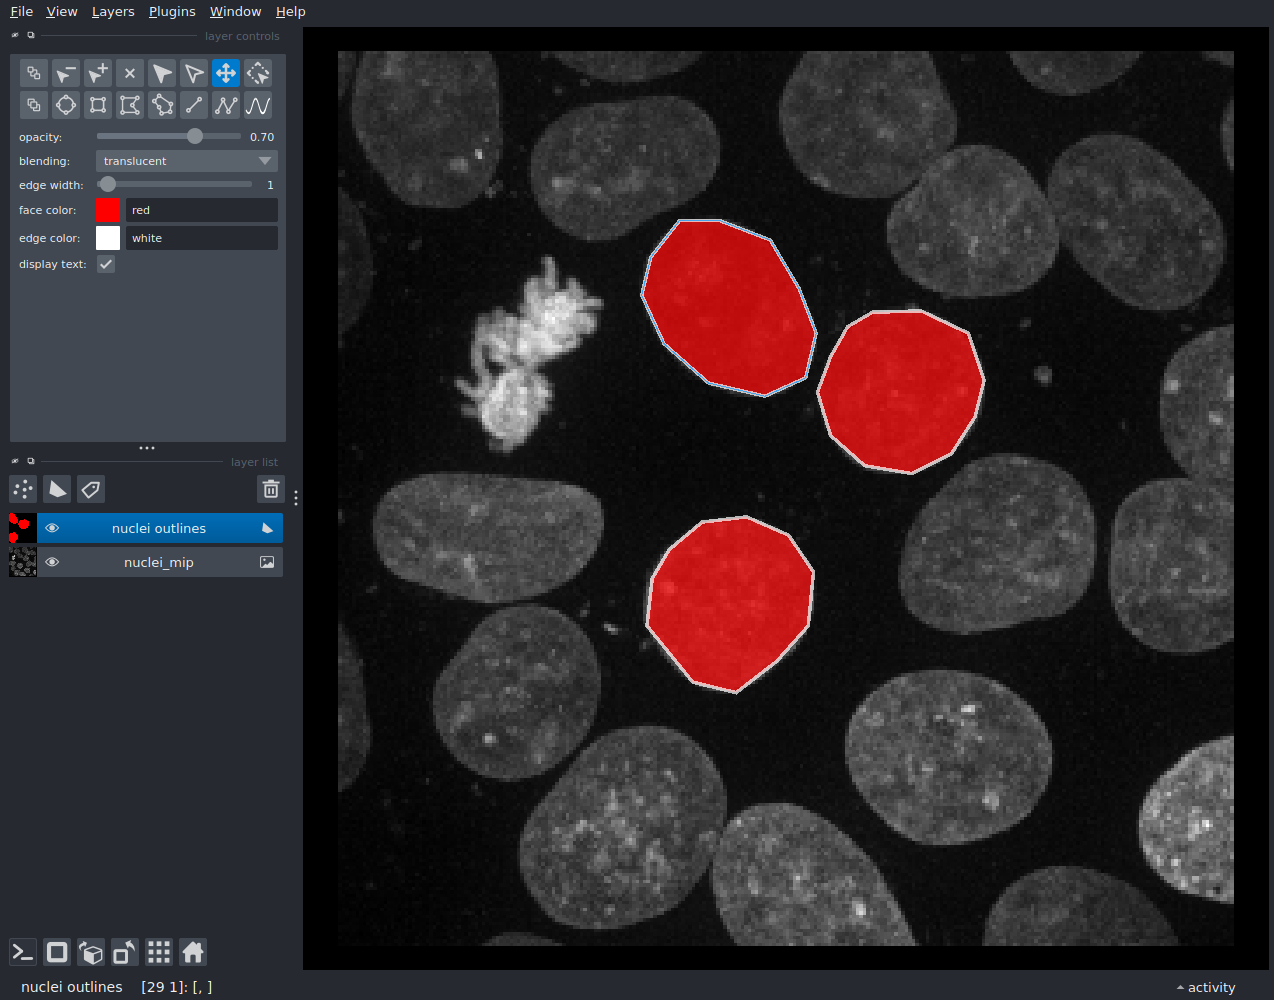

In [22]:
nbscreenshot(viewer)

The vertices for these shapes can be obtained from the shapes layer as follows:

In [23]:
# The list of vertices for each shape
viewer.layers['nuclei outlines'].data

[array([[142.1207  ,  94.13482 ],
        [150.36827 ,  89.26125 ],
        [163.8643  ,  87.761696],
        [179.98457 , 100.882835],
        [182.98369 , 113.254196],
        [173.98633 , 124.87578 ],
        [163.8643  , 133.87314 ],
        [148.49384 , 135.3727  ],
        [137.99692 , 128.24979 ],
        [132.74846 , 116.25331 ],
        [134.24802 , 103.507065]], dtype=float32),
 array([[ 87.01191 , 140.24626 ],
        [ 97.133934, 136.49736 ],
        [109.505295, 140.24626 ],
        [118.12776 , 149.9934  ],
        [120.3771  , 163.48943 ],
        [114.75375 , 174.73611 ],
        [104.256836, 181.48413 ],
        [ 93.759926, 184.10835 ],
        [ 80.26389 , 179.60968 ],
        [ 73.89077 , 166.11365 ],
        [ 74.265656, 152.24274 ],
        [ 78.38944 , 145.11983 ]], dtype=float32),
 array([[ 48.023376, 108.38063 ],
        [ 48.023376,  97.133934],
        [ 58.52029 ,  88.88636 ],
        [ 69.39209 ,  86.26213 ],
        [ 83.263016,  92.63526 ],
        [ 94.5

These shapes, and the underlying image can be saved as an svg file using our dedicated svg writer. This functionality is useful if you want to put the image and the shapes into a tool like illustrator when preparing a figure or a presentation.

In [24]:
#viewer.layers.save('nuclei-outlines.svg', plugin='napari-svg')

Alternately, the shapes can be saved to a `csv` file just like we saved the points earlier.

One common thing to use a shapes for is creating a binary mask or labels image where each pixel is assigned an integer label of the shape it is contained within, if any. napari provides some tooling to make these conversions easy.

In [25]:
# Convert the polygons into labels
shape = viewer.layers['nuclei_mip'].data.shape
nuclei_labels = viewer.layers['nuclei outlines'].to_labels(labels_shape=shape)

print('Number of labels:', nuclei_labels.max())

Number of labels: 3


We can now add this labels image to the viewer as a labels layer.

In [26]:
# Add the cell segmentation labels as a labels layer
viewer.add_labels(nuclei_labels);

# Turn off the visibility of the shapes layer so as not to get confused
viewer.layers['nuclei outlines'].visible = False

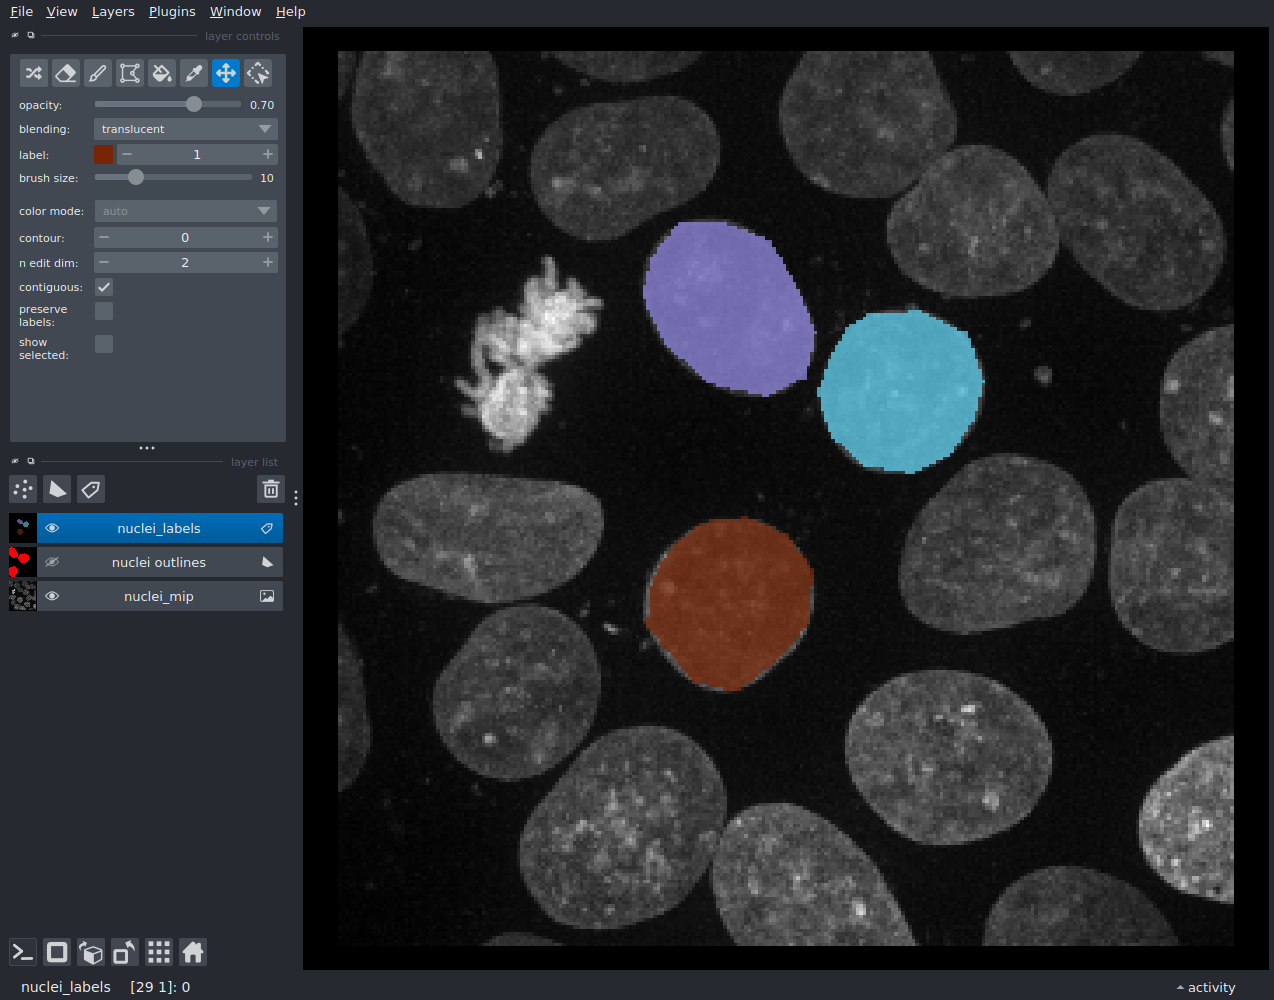

In [27]:
nbscreenshot(viewer)

````{tip}
If you want to *remove* layers programmatically, you can do so by index, for
example to remove the bottom-most layer (0th index):

```python
viewer.layers.pop(0)    # remove the bottom-most layer
```
or you can also remove a layer by passing the layer directly:

```python
viewer.layers.remove(viewer.layers['layer to remove'])
```
````

## Painting labels for pixel-wise annotations

With the labels layer we can now make pixel-wise annotations using a paintbrush, fill bucket, 
and eraser tools (see the row of buttons in the control panel in the top left of the viewer).

Using these tools we can touch up any of the labels that we got from our polygon masks or draw entirely new ones. As noted for Points layers, napari does support painting labels while in 3D viewer mode, but it
is tricky to paint within the volume due to the mouse/2D screen limitations.

```{tip}
For improving your manually labeling workflow, be sure to check out the Labels layer keybindings
in the napari Preferences/Settings. For example, by default the M-key will increment the label to the next unused label, while the P-key will toggle preserving existing labels, preventing you from painting over them.
```

In [28]:
# dilate labels a bit to show a change
from skimage.morphology import dilation
viewer.layers['nuclei_labels'].data = dilation(viewer.layers['nuclei_labels'].data)

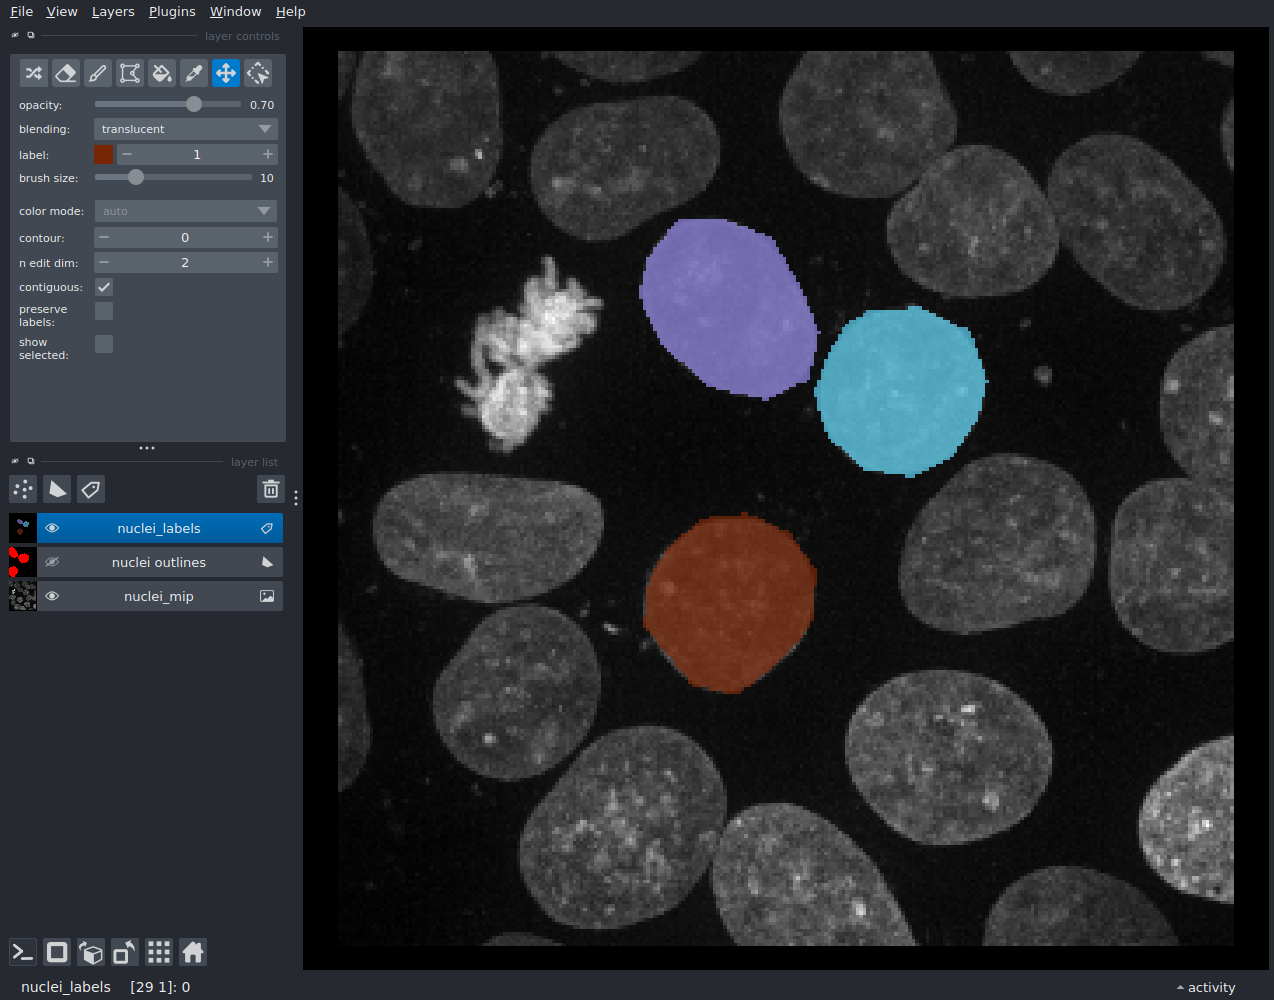

In [29]:
nbscreenshot(viewer)

In [30]:
# Save out the nuclei labels as a tiff file
viewer.layers['nuclei_labels'].save('nuclei-labels.tif', plugin='napari');

In [31]:
# Note that the cell labels could be reloaded into the viewer as follows
viewer.open('nuclei-labels.tif', name='saved nuclei', plugin='napari');

viewer.layers['nuclei_labels'].visible = False

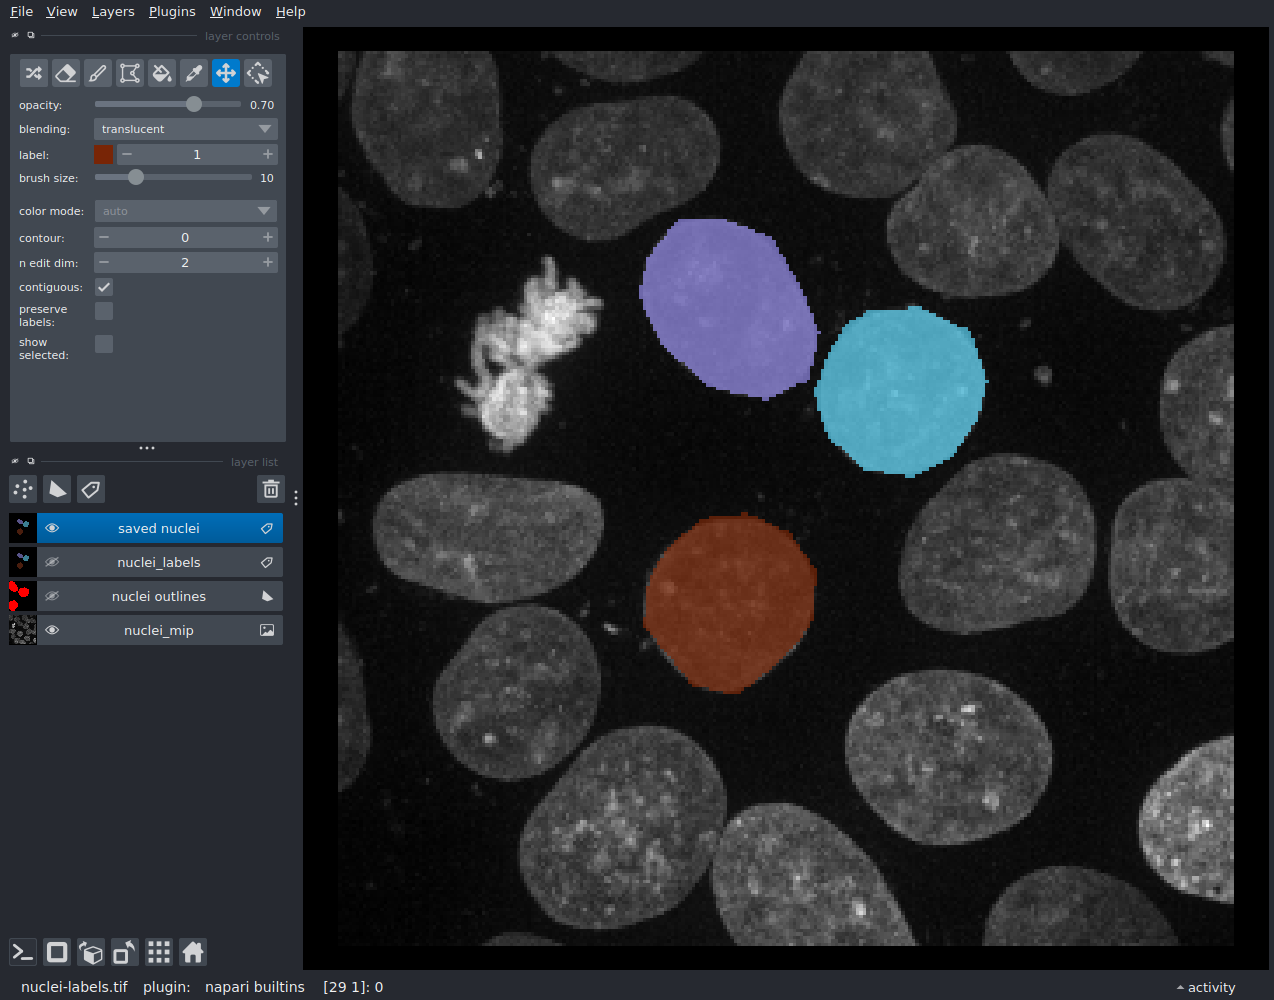

In [32]:
nbscreenshot(viewer)

One simple thing someone might want to do is quantify the total amount of signal inside our original image relative to the total amount of area for each of our labels. Using some simple Python we can do this as follows:

In [33]:
n_labels = viewer.layers['nuclei_labels'].data.max()

ratios = []
for label_id in range(n_labels):
    inside_pixels = viewer.layers['nuclei_labels'].data == label_id
    area = inside_pixels.sum()
    signal = viewer.layers['nuclei_mip'].data[inside_pixels].sum()
    ratios.append(signal / area)
    
print('Signal per unit area for our labels:', ratios)

Signal per unit area for our labels: [np.float64(13350.999649538559), np.float64(23251.752136752137), np.float64(19298.510474090406)]


As with the points and shapes layers we also have a properties dictionary on the labels layer to make it easy to attach extra attributes to each labeled region.

## Conclusions

We've now seen how to use the **Points**, **Shapes**, and **Labels** layers to produce manual annotations in napari and save those annotations in meaningful formats.

The next lessons will teach us how to perform interactive analyses in napari and more!